## 1. Configuración Inicial
- Montar Google Drive.
- Definir la ruta base a la carpeta del proyecto.
- Importar archivo module_utils con todas las librerias y paquetes necesarios.

In [29]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Navegar a la ruta correcta (SIN espacios)
%cd "/content/drive/MyDrive/ProyectoDL/Codigo_reproducible"

# Verificar archivos
print("Archivos en el directorio:")
!ls -la

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ProyectoDL/Codigo_reproducible
Archivos en el directorio:
total 45065
-rw------- 1 root root   419983 Jun 16 11:51 02_simplified_analysis.ipynb
-rw------- 1 root root    19722 Jun 16 11:36 module_utils.py
-rw------- 1 root root 45701954 Jun 16 11:52 poi_engagement_model_complete.pth
drwx------ 2 root root     4096 Jun 16 11:36 __pycache__


In [30]:
# Convertir el archivo de texto a Python
!mv module_utils.txt module_utils.py

# Verificar que se creó correctamente
!ls -la *.py

# Cargar el módulo
from module_utils import *

# Inicializar proyecto
device, base_path = initialize_project()

mv: cannot stat 'module_utils.txt': No such file or directory
-rw------- 1 root root 19722 Jun 16 11:36 module_utils.py
Inicializando proyecto de Deep Learning...
Instalando opencv-python...
Instalando scikit-learn...
Instalando Pillow...
Dependencias verificadas/instaladas
=== INFORMACIÓN DEL ENTORNO ===
Python: 3.11.13
PyTorch: 2.6.0+cu124
Pandas: 2.2.2
NumPy: 2.0.2
GPU disponible: Tesla T4
Memoria GPU: 15.8 GB
Semillas configuradas con valor: 42
Entorno configurado correctamente
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado correctamente
Proyecto inicializado en: /content/drive/MyDrive/ProyectoDL/


In [31]:
# Ajustar la ruta base para que apunte a la carpeta correcta
base_path = '/content/drive/MyDrive/ProyectoDL/'
PROJECT_CONFIG['BASE_PATH'] = base_path

print(f"Ruta base ajustada a: {base_path}")

# Verificar que podemos acceder a los datos
data_path = os.path.join(base_path, 'data', 'poi_dataset.csv')
print(f"Buscando datos en: {data_path}")

# Verificar si existe el archivo de datos
if os.path.exists(data_path):
    print("✓ Archivo de datos encontrado")
else:
    print("✗ Archivo de datos NO encontrado")
    print("Archivos en la carpeta:")
    !ls -la data/ 2>/dev/null || echo "Carpeta 'data' no existe"

Ruta base ajustada a: /content/drive/MyDrive/ProyectoDL/
Buscando datos en: /content/drive/MyDrive/ProyectoDL/data/poi_dataset.csv
✓ Archivo de datos encontrado



## 2. Carga de datos


In [32]:
# Cargar datos
data_path = os.path.join(base_path, PROJECT_CONFIG['DATA_FILE'])
try:
    df = pd.read_csv(data_path)
    print("Archivo cargado exitosamente")
    print(f"Dataset shape: {df.shape}")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo en '{data_path}'")

Archivo cargado exitosamente
Dataset shape: (1569, 14)
                                     id  \
0  4b36a3ed-3b28-4bc7-b975-1d48b586db03   
1  e32b3603-a94f-49df-8b31-92445a86377c   
2  0123a69b-13ac-4b65-a5d5-71a95560cff5   
3  390d7d9e-e972-451c-b5e4-f494af15e788   
4  023fc1bf-a1cd-4b9f-af78-48792ab1a294   

                                                name  \
0                                  Galería Fran Reus   
1                            Convento de San Plácido   
2             Instituto Geológico y Minero de España   
3                              Margarita Gil Roësset   
4  Museo del Traje. Centro de Investigación del P...   

                                    shortDescription  \
0  La Galería Fran Reus es un espacio dedicado a ...   
1  El Convento de San Plácido en Madrid, fundado ...   
2  El Instituto Geológico y Minero de España, sit...   
3  Margarita Gil Roësset, escultora y poetisa esp...   
4  El Museo del Traje de Madrid, fundado en 2004,...   

            

3. Análisis Exploratorio de Datos (EDA)

## 2.1 Descripción general del dataset

- Información general y tipos de datos
- Dimensiones del dataset

In [33]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


In [34]:
# Dimensiones (filas, columnas)
print("\nDimensión Dataset:")
df.shape


Dimensión Dataset:


(1569, 14)

## 2.2 Valores nulos

- Conteo de valores nulos por columna

In [35]:
# Conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
id                  0
name                0
shortDescription    0
categories          0
tier                0
locationLon         0
locationLat         0
tags                0
xps                 0
Visits              0
Likes               0
Dislikes            0
Bookmarks           0
main_image_path     0
dtype: int64


## 2.3 Análisis de variables numéricas

- Estadística Descriptiva de las variables numéricas:
  - Visits
  - Likes
  - Dislikes
  - Bookmarks
  - tier
  - xps
- Histograma

In [36]:
# Análisis de variables numéricas
numeric_vars = ["Visits", "Likes", "Dislikes", "Bookmarks", "tier", "xps"]
print("\nEstadísticas descriptivas:")
df[numeric_vars].describe().round()


Estadísticas descriptivas:


Visits    Likes  Dislikes  Bookmarks    tier     xps
count   1569.0   1569.0    1569.0     1569.0  1569.0  1569.0
mean   10012.0   3624.0    2526.0      973.0     2.0   750.0
std        5.0   4818.0    2226.0     1453.0     1.0   228.0
min    10001.0    100.0      52.0       50.0     1.0     0.0
25%    10008.0    464.0     937.0      116.0     1.0   600.0
50%    10011.0   1434.0    2718.0      306.0     1.0   700.0
75%    10015.0   6840.0    3399.0     1309.0     2.0  1000.0
max    10038.0  26425.0   10999.0     8157.0     4.0  1000.0

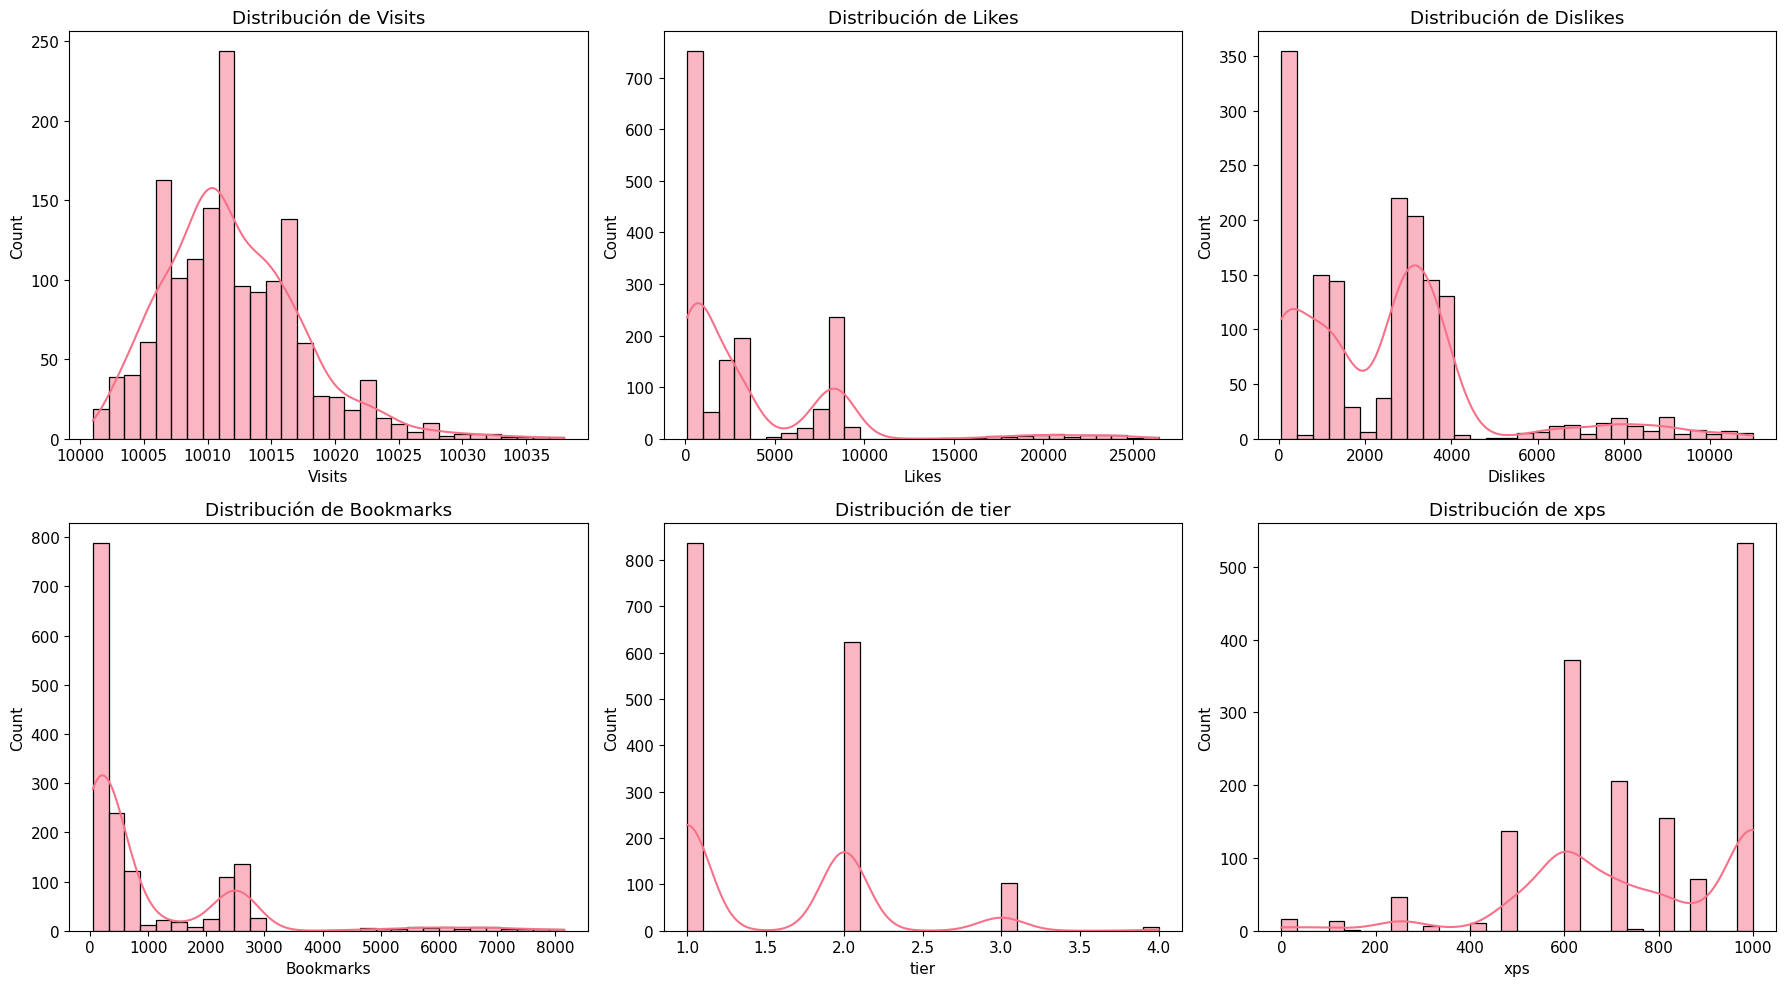

In [37]:
# Histograma
plt.figure(figsize=(18, 10))
for i, var in enumerate(numeric_vars):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

## 2.4 Análisis de variables categóricas

- Análisis de las variables categóricas:

  - tier
    - Valores únicos encontrados.
    - Frecuencia.

  - categories
    - Número total de categorías únicas detectadas.
    - Top 10 categorías más frecuentes.

  - tags
    - Número total de tags únicos.
    - Top 10 tags más frecuentes.

- Visualización de las frecuencias

In [38]:
# Análisis de la variable 'tier'
print("Valores únicos en 'tier':", df["tier"].unique())
print("Frecuencia de 'tier':")
print(df["tier"].value_counts())
print("\n")

Valores únicos en 'tier': [1 2 3 4]
Frecuencia de 'tier':
tier
1    837
2    622
3    103
4      7
Name: count, dtype: int64




In [39]:
# Variable 'categories'
all_categories = [cat for cats in df["categories"].apply(eval) for cat in cats]
unique_categories = set(all_categories)
cat_frequencies = pd.Series(all_categories).value_counts()
print("Valores únicos de 'categories':")
print(df["categories"].unique()[:5])
print("Número total de categorías únicas:", len(cat_frequencies))
print("Top 10 categorías más frecuentes:")
print(cat_frequencies.head(10))
print("\n")

Valores únicos de 'categories':
["['Escultura', 'Pintura']" "['Patrimonio', 'Historia']"
 "['Ciencia', 'Patrimonio']" "['Cultura']" "['Patrimonio', 'Cultura']"]
Número total de categorías únicas: 12
Top 10 categorías más frecuentes:
Historia        1297
Cultura         1030
Arquitectura     660
Patrimonio       603
Escultura        482
Misterio         382
Ciencia          132
Ocio              76
Pintura           48
Naturaleza        43
Name: count, dtype: int64




In [40]:
# Análisis de la variable 'tags'
all_tags = [tag for tags in df["tags"].apply(eval) for tag in tags]
tag_frequencies = pd.Series(all_tags).value_counts()

print("\nValores únicos de 'tags' en la muestra:")
print(df["tags"].unique()[:5])
print("Número total de tags únicos:", len(tag_frequencies))
print("Top 10 tags más frecuentes:")
print(tag_frequencies.head(10))


Valores únicos de 'tags' en la muestra:
['[]' "['s.XX']"
 "['Canaletto', 'paisaje', 'vedutismo', 's.XVIII', 'Cuadro', 'Venecia']"
 "['s.XX', 'Primera Guerra Mundial ', 'expresionismo', 'paisaje', 'Cuadro']"
 "['Cuadro', 's.XX']"]
Número total de tags únicos: 2935
Top 10 tags más frecuentes:
Historia        802
Madrid          700
Cultura         583
Arquitectura    398
Patrimonio      353
Arte            329
Escultura       328
Estatua         269
Monumento       166
Naturaleza      150
Name: count, dtype: int64


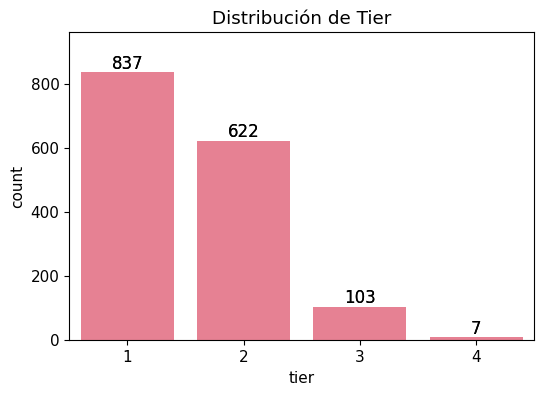

In [41]:
# Countplot para 'tier'
plt.figure(figsize=(6,4))
ax = sns.countplot(x="tier", data=df, color="#3c8dbc")
sns.countplot(x="tier", data=df)
plt.title("Distribución de Tier")

# Añade el valor sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.ylim(0, df['tier'].value_counts().max()*1.15)
plt.show()

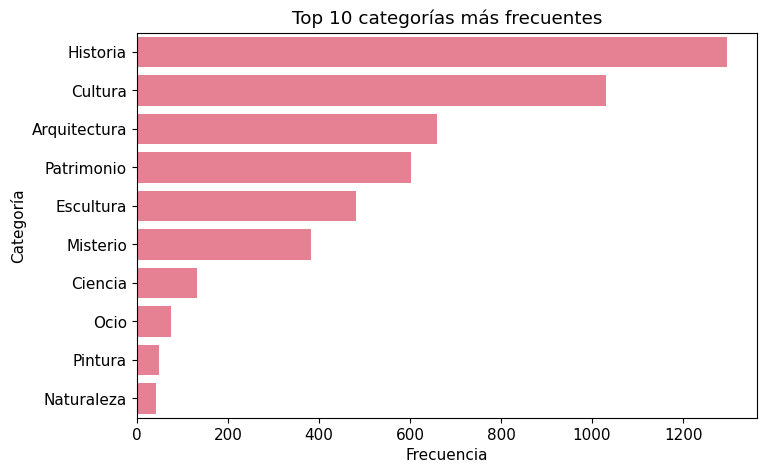

In [42]:
# Barplot para top 10 categorías
all_cats = [cat for cats in df['categories'].apply(eval) for cat in cats]
cat_freq = pd.Series(all_cats).value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=cat_freq.index, x=cat_freq.values)
plt.title("Top 10 categorías más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría")
plt.show()

## 2.5 Visualización geoespacial de los POIs

- Mapa interactivo con la ubicación de todos los POIs y popup informativo.

In [43]:
# Visualización geoespacial
m = create_folium_map(df)
m

## 2.6 Visualización exploratoria de imágenes

- Grid de imágenes aleatorias de POIs con su nivel de tier.

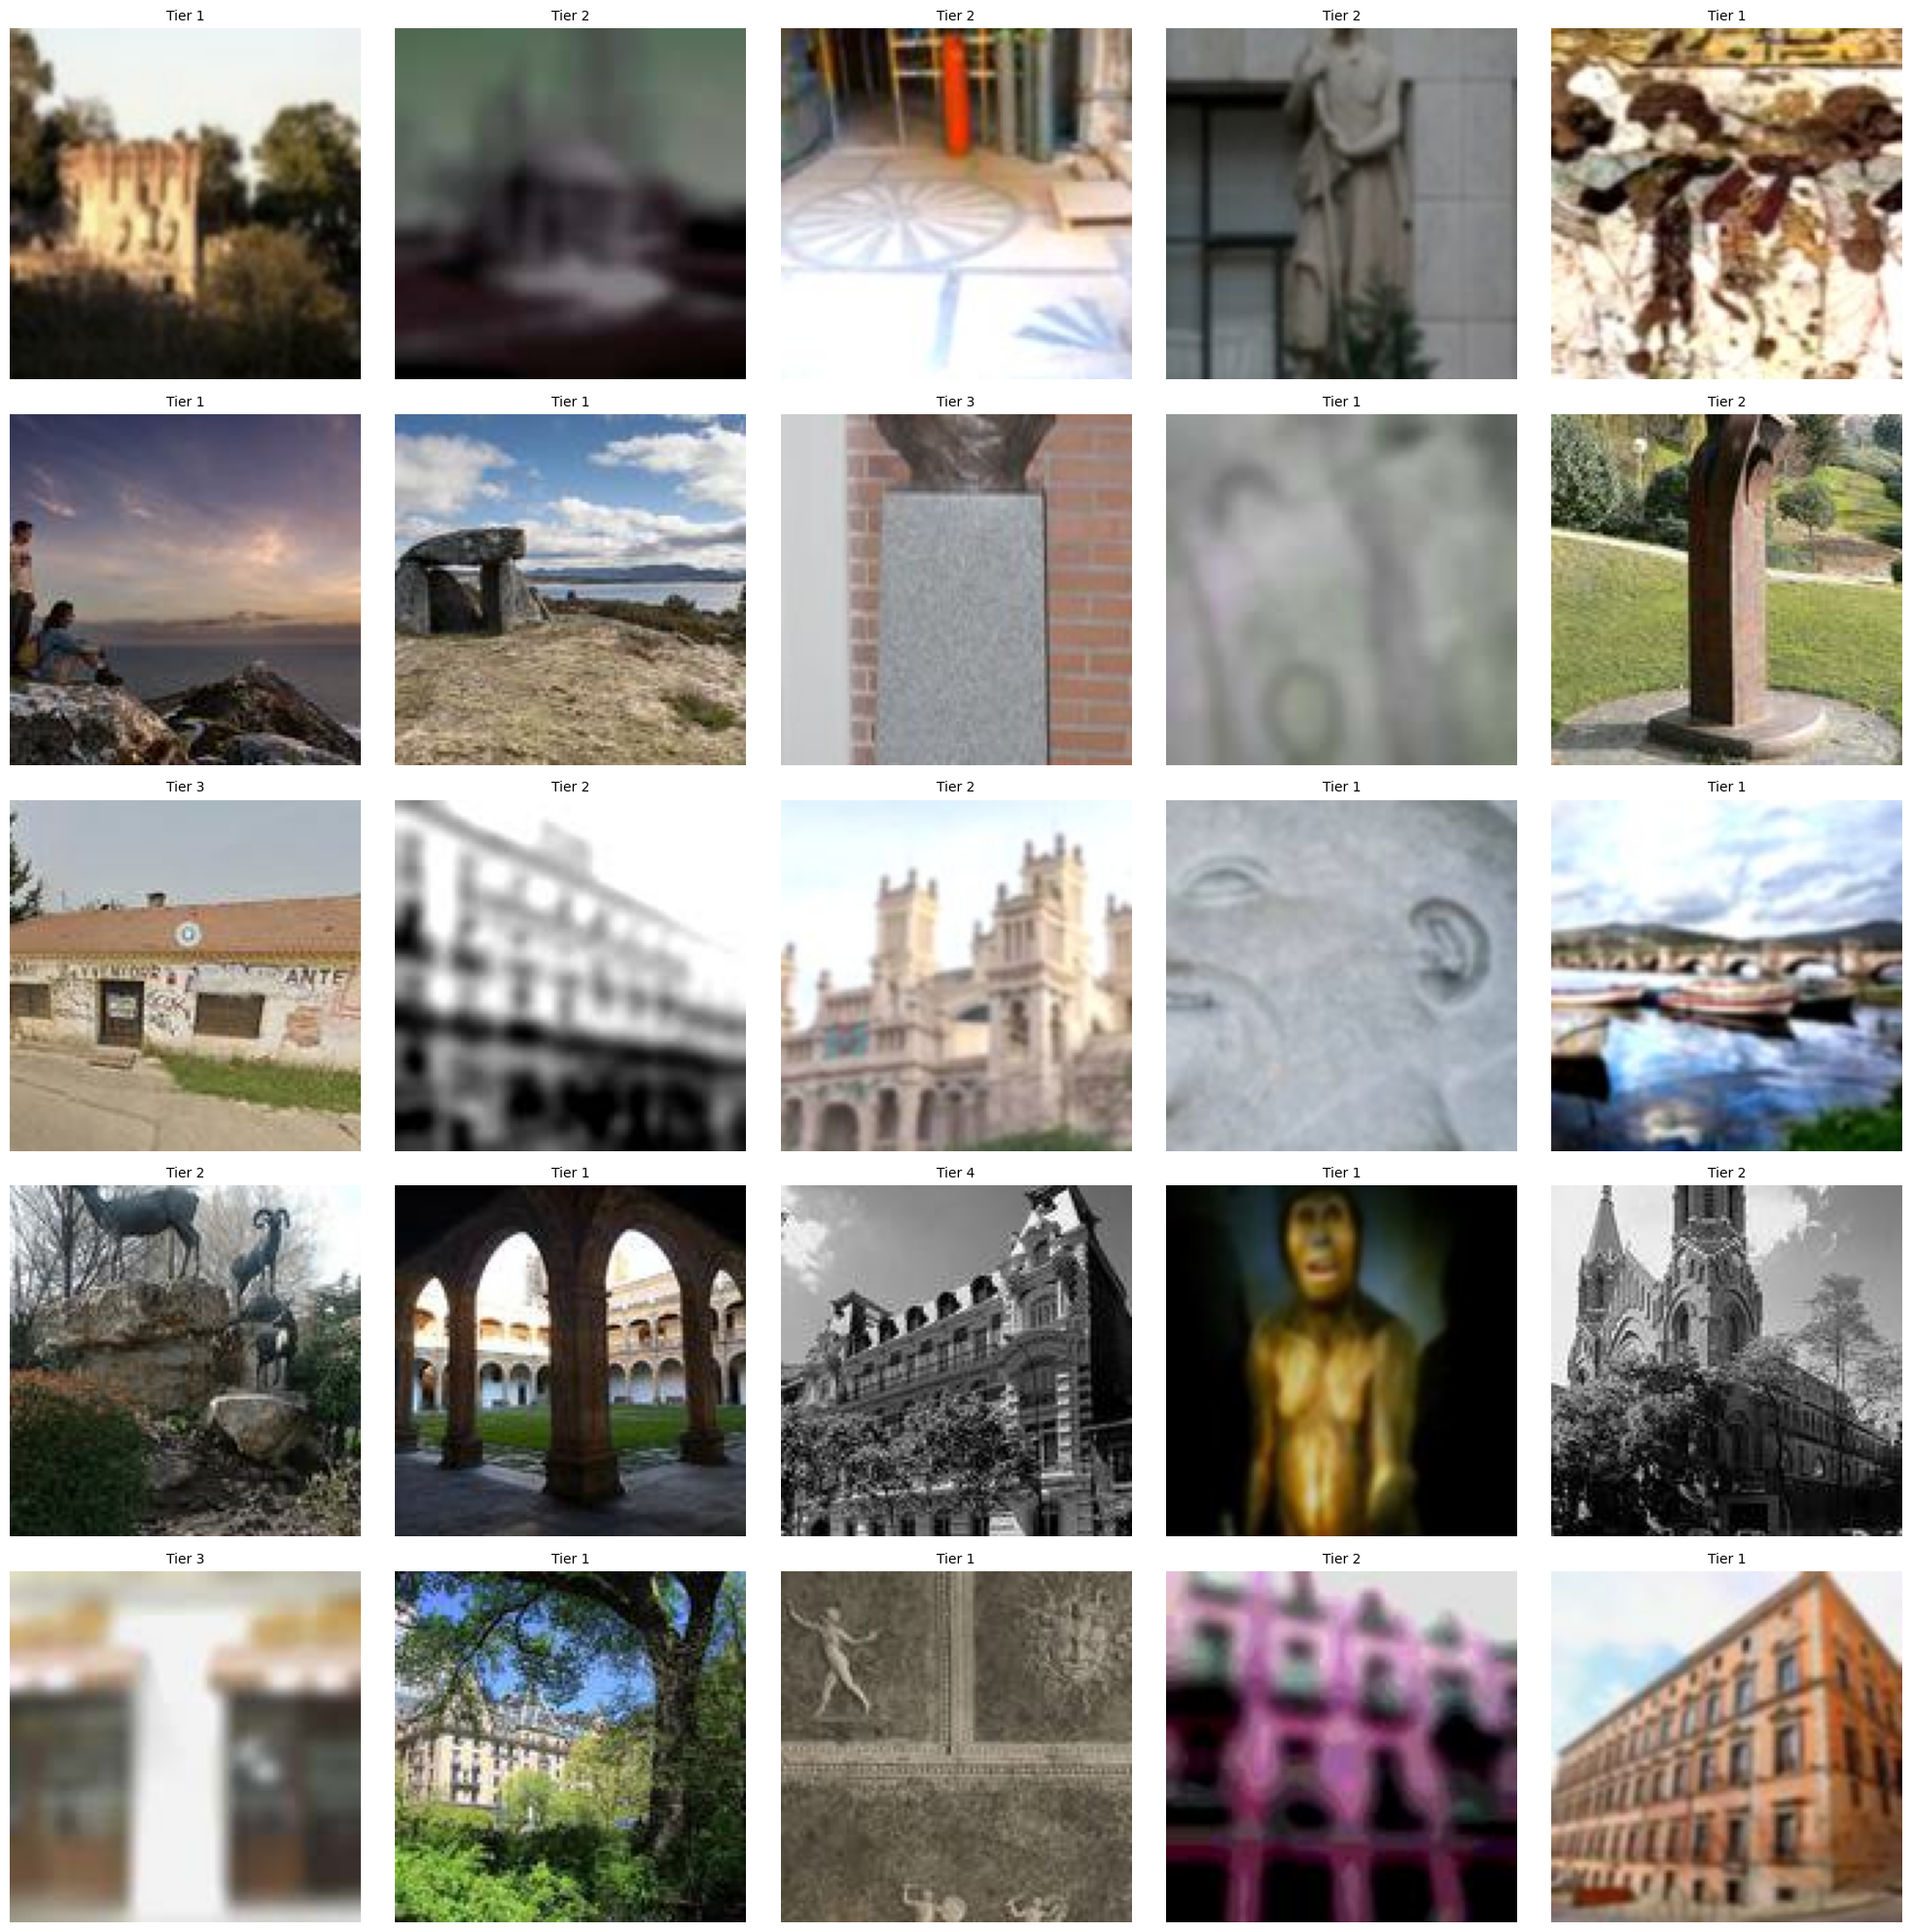

In [44]:
# Grid de imágenes aleatorias
sample_images = df.sample(n=25, random_state=42)
plt.figure(figsize=(20, 20))
for idx, (_, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(base_path, 'data', row['main_image_path'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = np.ones((224, 224, 3), dtype=np.uint8) * 255
    plt.subplot(5, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Tier {row['tier']}", fontsize=10)
plt.tight_layout()
plt.show()

## 2.7 Creación y normalización de la métrica de engagement

- Normalización automática de Visits, Likes, Bookmarks y Dislikes.
- Cálculo de la métrica ponderada de engagement.

In [45]:
# Crear métrica de engagement
df, engagement_scaler = create_engagement_metric(df)

Métrica de engagement creada


## 2.8 Visualización y análisis del engagement score

- Histograma.
- Boxplot.
- Estadísticas descriptivas básicas.

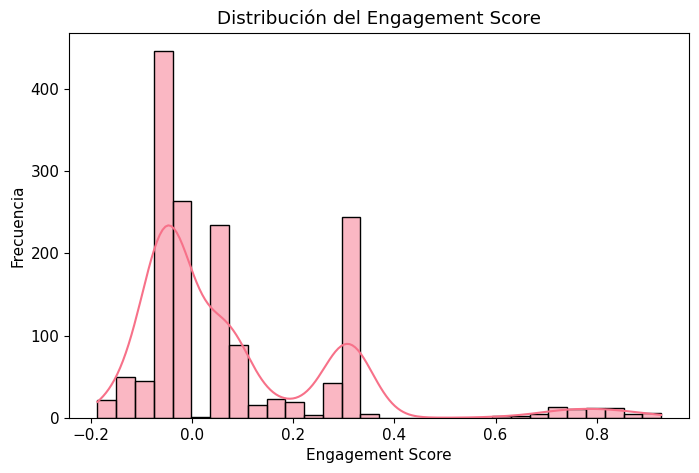

In [46]:
# Visualización del engagement score
plt.figure(figsize=(8, 5))
sns.histplot(df['engagement_score'], bins=30, kde=True)
plt.title('Distribución del Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Frecuencia')
plt.show()

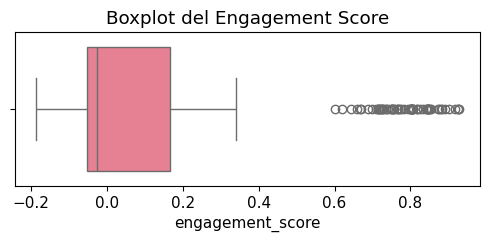

In [47]:
# Boxplot del engagement score
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['engagement_score'])
plt.title('Boxplot del Engagement Score')
plt.show()

In [48]:
# Estadísticas descriptivas
print("Estadísticas del engagement score:")
df['engagement_score'].describe().round(2)

Estadísticas del engagement score:


count    1569.00
mean        0.08
std         0.21
min        -0.19
25%        -0.05
50%        -0.03
75%         0.17
max         0.93
Name: engagement_score, dtype: float64

## 2.9 Conversión de la métrica de engagement en 5 clases

- Conversión del engagement score en variable categórica ordinal de 5 niveles:    
  - Muy Bajo
  - Bajo
  - Medio
  - Alto
  - Excepcional
- Visualización del balance de clases resultante.

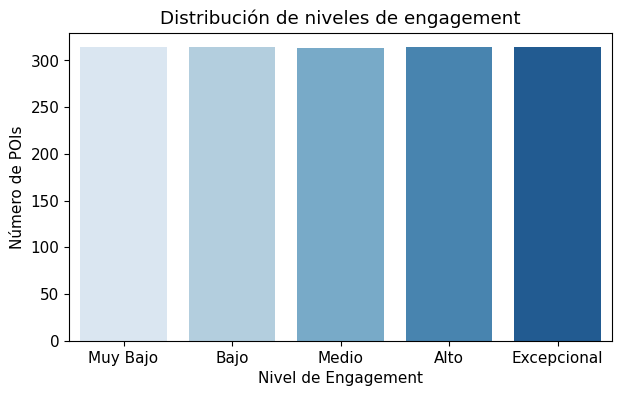


Distribución y proporción de clases (%):
engagement_level
Muy Bajo       20.01
Bajo           20.01
Alto           20.01
Excepcional    20.01
Medio          19.95
Name: proportion, dtype: float64


In [49]:
# Visualización del balance de clases
labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Excepcional']
plt.figure(figsize=(7,4))
sns.countplot(x='engagement_level', data=df, order=labels, palette='Blues')
plt.title('Distribución de niveles de engagement')
plt.xlabel('Nivel de Engagement')
plt.ylabel('Número de POIs')
plt.show()

print("\nDistribución y proporción de clases (%):")
print((df['engagement_level'].value_counts(normalize=True) * 100).round(2))

In [50]:
# Distribución numérica
print("\nDistribución y proporción de clases (%):")
(df['engagement_level'].value_counts(normalize=True) * 100).round(2)


Distribución y proporción de clases (%):


engagement_level
Muy Bajo       20.01
Bajo           20.01
Alto           20.01
Excepcional    20.01
Medio          19.95
Name: proportion, dtype: float64

## 2.10 Análisis de correlaciones entre variables

- Matriz de correlación entre engagement_score.

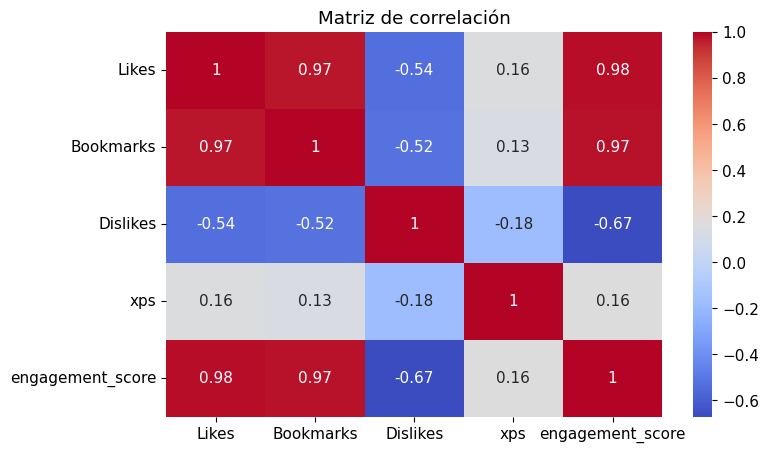

In [51]:
# Matriz Correlación
numeric_vars = ['Likes', 'Bookmarks', 'Dislikes', 'xps', 'engagement_score']
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

## 2.11 Análisis de la calidad de las imágenes

- Cálculo del score de calidad usando contraste y nitidez.
- Distribución del score de calidad de imagen.


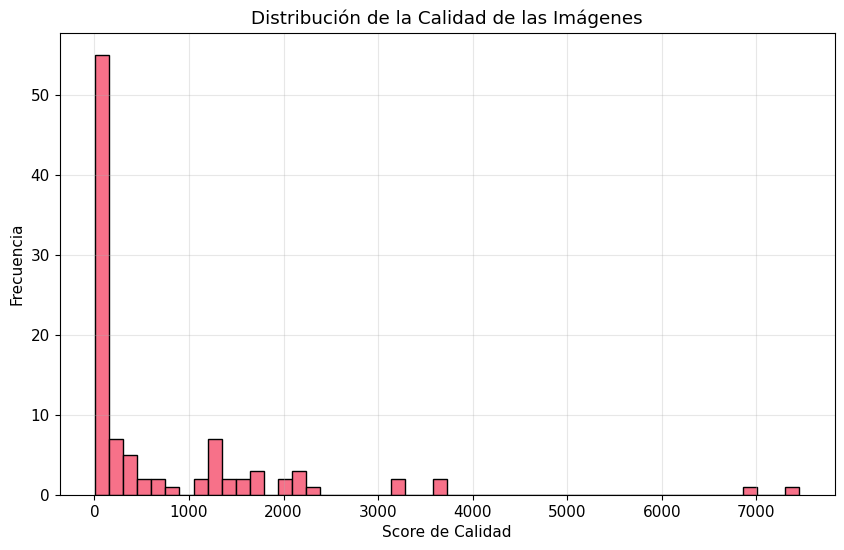

Calidad media: 724.53
Calidad mediana: 126.15
Imágenes procesadas correctamente: 100/100


In [63]:
# Analizamos la calidad de las imágenes calculando el contraste y nitidez
image_quality_metrics = []

for _, row in df.sample(n=100, random_state=42).iterrows():
    # Leemos la imagen (RUTA CORREGIDA)
    img = cv2.imread(os.path.join(PROJECT_CONFIG['BASE_PATH'], 'data', row['main_image_path']))

    # Verificar que la imagen se cargó correctamente
    if img is not None:
        # Convertimos a escala de grises
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculamos el contraste (desviación estándar)
        contrast = np.std(gray)

        # Calculamos la nitidez usando el Laplaciano
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        sharpness = np.var(laplacian)

        # Combinamos las métricas en un score
        quality_score = (contrast + sharpness) / 2
        image_quality_metrics.append(quality_score)
    else:
        # Si la imagen no se puede cargar, añadir 0
        image_quality_metrics.append(0)

# Creamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(image_quality_metrics, bins=50, edgecolor='black')
plt.title('Distribución de la Calidad de las Imágenes')
plt.xlabel('Score de Calidad')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Mostramos algunas estadísticas
print(f"Calidad media: {np.mean(image_quality_metrics):.2f}")
print(f"Calidad mediana: {np.median(image_quality_metrics):.2f}")
print(f"Imágenes procesadas correctamente: {len([x for x in image_quality_metrics if x > 0])}/100")

## 2.12 Relación entre calidad de imagen y engagement

- Análisis sobre una muestra de 100 imágenes.

- Cálculo de métrica de calidad de imagen basada en contraste y nitidez.

- Cálculo de correlación

- Scatter plot calidad vs engagement

Calidad de imagen calculada para 100 muestras
Correlación calidad de imagen - engagement score: 0.536


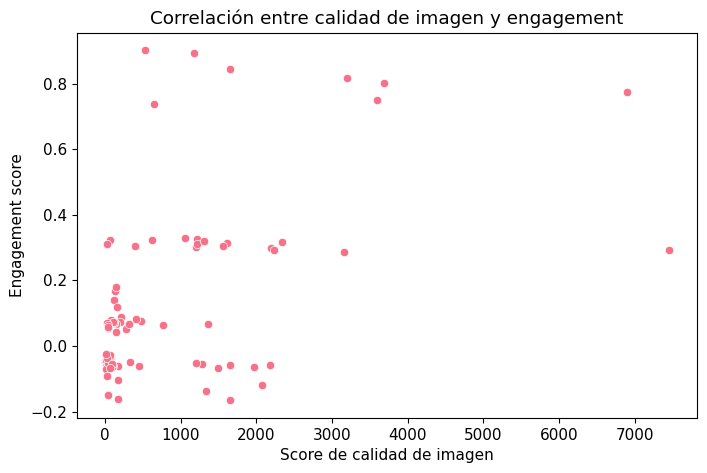

In [55]:
# Calcular calidad de imagen para muestra
df = calculate_image_quality_score(df, base_path, sample_size=100)

# Correlación entre calidad de imagen y engagement
df_plot = df.dropna(subset=['image_quality_score'])
if len(df_plot) > 0:
    correl = df_plot[['image_quality_score', 'engagement_score']].corr().iloc[0, 1]
    print(f"Correlación calidad de imagen - engagement score: {correl:.3f}")

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='image_quality_score', y='engagement_score', data=df_plot)
    plt.title('Correlación entre calidad de imagen y engagement')
    plt.xlabel('Score de calidad de imagen')
    plt.ylabel('Engagement score')
    plt.show()

# 3. Preprocesamiento de Datos

In [56]:
# Preprocesamiento completo
df, mlb_cat, mlb_tag, le_target, numeric_cols = preprocess_data(df)

# División y normalización
train_df, val_df, test_df, scaler_numeric = split_and_normalize_data(df, numeric_cols)

# Preparar features y tensores
X_train, y_train, X_val, y_val, X_test, y_test, model_features = prepare_features_and_tensors(
    train_df, val_df, test_df, numeric_cols
)

# Información del preprocesamiento
num_classes = len(le_target.classes_)
print(f"\nNúmero de clases: {num_classes}")
print(f"Mapeo de clases:")
for i, class_name in enumerate(le_target.classes_):
    print(f"  {class_name} -> {i}")

print(f"Features totales: {len(model_features)}")
print(f"Shapes finales:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  X_test: {X_test.shape}")


Preprocesamiento completado
División completada - Train: 1098, Val: 235, Test: 236
Tensores creados - Features: 31

Número de clases: 5
Mapeo de clases:
  Alto -> 0
  Bajo -> 1
  Excepcional -> 2
  Medio -> 3
  Muy Bajo -> 4
Features totales: 31
Shapes finales:
  X_train: torch.Size([1098, 31])
  y_train: torch.Size([1098])
  X_val: torch.Size([235, 31])
  X_test: torch.Size([236, 31])


## 4. Definición del Modelo
- CNN preentrenada (ResNet18) para extracción de características de imágenes
- MLP para procesamiento de metadatos
- Fusión de características y clasificador final

In [57]:
# Obtener transformaciones
transform_train, transform_val = get_transforms()

# Crear datasets
train_img_paths = train_df['main_image_path'].values
val_img_paths = val_df['main_image_path'].values
test_img_paths = test_df['main_image_path'].values

train_dataset = POIDataset(X_train.numpy(), y_train.numpy(), train_img_paths, base_path, transform_train)
val_dataset = POIDataset(X_val.numpy(), y_val.numpy(), val_img_paths, base_path, transform_val)
test_dataset = POIDataset(X_test.numpy(), y_test.numpy(), test_img_paths, base_path, transform_val)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=PROJECT_CONFIG['BATCH_SIZE'], shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=PROJECT_CONFIG['BATCH_SIZE'], shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=PROJECT_CONFIG['BATCH_SIZE'], shuffle=False, num_workers=0)

print(f"DataLoaders creados:")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches: {len(val_loader)}")
print(f"  Test batches: {len(test_loader)}")

DataLoaders creados:
  Train batches: 69
  Val batches: 15
  Test batches: 15


In [58]:
# Crear modelo
metadata_size = X_train.shape[1]
model = MultimodalPOIModel(metadata_size, num_classes).to(device)

# Contar parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Parámetros totales: {total_params:,}")
print(f"Parámetros entrenables: {trainable_params:,}")

# Configuración de entrenamiento
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=PROJECT_CONFIG['LEARNING_RATE'], weight_decay=1e-4, eps=1e-8)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, min_lr=1e-7)

Parámetros totales: 11,399,877
Parámetros entrenables: 5,076,613


## 5. Entrenamiento del Modelo
- Función de pérdida CrossEntropyLoss para clasificación multiclase
- Optimizador Adam con weight decay
- Scheduler para reducir learning rate progresivamente

In [59]:
# Variables de entrenamiento
train_losses = []
train_accs = []
val_losses = []
val_accs = []

best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print("Iniciando entrenamiento...")

for epoch in range(PROJECT_CONFIG['NUM_EPOCHS']):
    print(f"\nÉpoca {epoch+1}/{PROJECT_CONFIG['NUM_EPOCHS']}")

    # Entrenamiento
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

    # Validación cada EVAL_EVERY épocas
    if epoch % PROJECT_CONFIG['EVAL_EVERY'] == 0 or epoch == PROJECT_CONFIG['NUM_EPOCHS'] - 1:
        val_loss, val_acc = validate_epoch(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
            print(f"  Nuevo mejor modelo guardado")
        else:
            patience_counter += 1

        if patience_counter >= PROJECT_CONFIG['PATIENCE']:
            print(f"\nEarly stopping en época {epoch+1}")
            break

        scheduler.step(val_loss)

    else:
        # Mantener listas sincronizadas
        if val_losses:
            val_losses.append(val_losses[-1])
            val_accs.append(val_accs[-1])
        print(f"  (Validación saltada)")

# Cargar mejor modelo
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\nMejor modelo cargado con Val Loss: {best_val_loss:.4f}")

print("Entrenamiento completado!")

Iniciando entrenamiento...

Época 1/10
  Train Loss: 1.8025, Train Acc: 25.87%
  Val Loss: 1.4816, Val Acc: 42.55%
  Nuevo mejor modelo guardado

Época 2/10
  Train Loss: 1.4547, Train Acc: 43.17%
  (Validación saltada)

Época 3/10
  Train Loss: 1.3090, Train Acc: 51.09%
  Val Loss: 1.3182, Val Acc: 47.66%
  Nuevo mejor modelo guardado

Época 4/10
  Train Loss: 1.2520, Train Acc: 54.28%
  (Validación saltada)

Época 5/10
  Train Loss: 1.1377, Train Acc: 61.48%
  Val Loss: 1.2707, Val Acc: 47.66%
  Nuevo mejor modelo guardado

Época 6/10
  Train Loss: 1.1007, Train Acc: 60.84%
  (Validación saltada)

Época 7/10
  Train Loss: 1.0578, Train Acc: 65.12%
  Val Loss: 1.2080, Val Acc: 53.19%
  Nuevo mejor modelo guardado

Época 8/10
  Train Loss: 1.0100, Train Acc: 66.67%
  (Validación saltada)

Época 9/10
  Train Loss: 0.9878, Train Acc: 69.49%
  Val Loss: 1.1605, Val Acc: 54.47%
  Nuevo mejor modelo guardado

Época 10/10
  Train Loss: 0.9094, Train Acc: 73.04%
  Val Loss: 1.1929, Val Acc: 5

## 6. Visualización de Resultados
- Gráficos de evolución de loss y accuracy.
- Análisis de la convergencia del modelo.
- Identificación de posible overfitting.

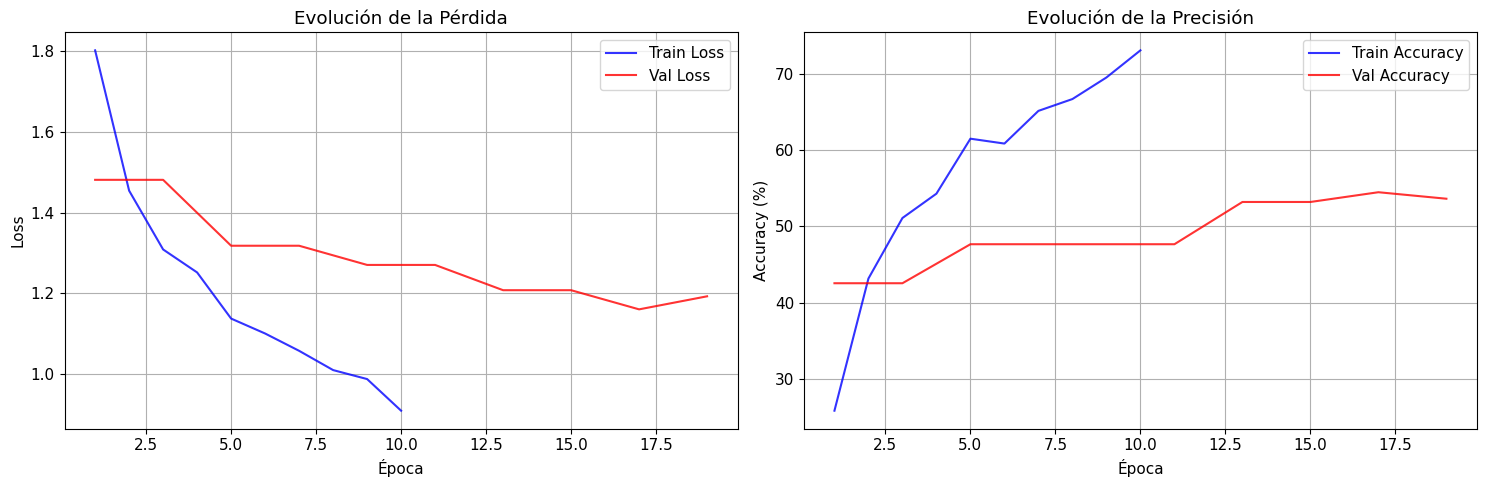

In [60]:
# Visualizar historia del entrenamiento
plot_training_history(train_losses, val_losses, train_accs, val_accs, PROJECT_CONFIG['EVAL_EVERY'])

## 7. Evaluación Final
- Predicciones en conjunto de test no visto durante entrenamiento.
- Cálculo de métricas finales: accuracy, precision, recall, F1-score.
- Matriz de confusión para análisis detallado.

=== EVALUACIÓN FINAL ===
Test Accuracy: 0.5424

Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.56      0.68      0.62        47
        Bajo       0.36      0.45      0.40        47
 Excepcional       0.70      0.73      0.71        48
       Medio       0.52      0.53      0.53        47
    Muy Bajo       0.65      0.32      0.43        47

    accuracy                           0.54       236
   macro avg       0.56      0.54      0.54       236
weighted avg       0.56      0.54      0.54       236



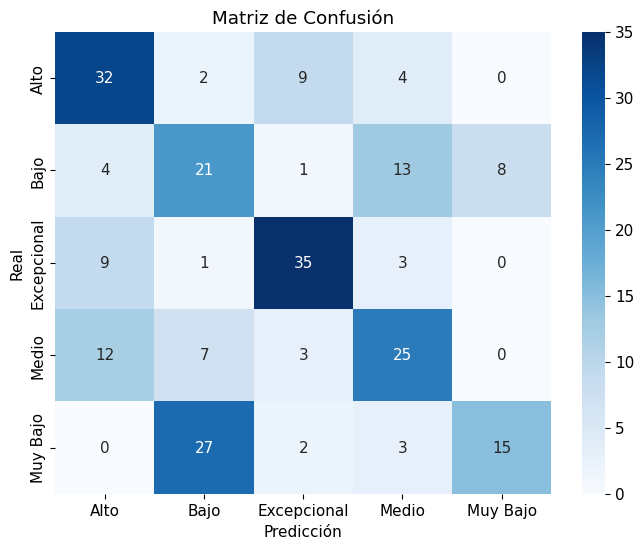

In [61]:
# Evaluación completa en test
print("=== EVALUACIÓN FINAL ===")
test_accuracy = evaluate_model(model, test_loader, device, le_target)

## 8. Guardado del Modelo
- Guardado del modelo y sus parámetros.
- Guardado de objetos de preprocesamiento necesarios para inferencia.
- Preparación para deployment o uso posterior.

In [62]:
# Guardar modelo y configuración
torch.save({
    'model_state_dict': model.state_dict(),
    'model_config': {
        'metadata_size': metadata_size,
        'num_classes': num_classes,
        'model_features': model_features
    },
    'preprocessing_objects': {
        'scaler_numeric': scaler_numeric,
        'mlb_cat': mlb_cat,
        'mlb_tag': mlb_tag,
        'le_target': le_target
    },
    'results': {
        'best_val_loss': best_val_loss,
        'test_accuracy': test_accuracy,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accs': train_accs,
        'val_accs': val_accs
    },
    'project_config': PROJECT_CONFIG
}, 'poi_engagement_model_complete.pth')

print("Modelo completo guardado como 'poi_engagement_model_complete.pth'")
print("Proyecto completado exitosamente!")

Modelo completo guardado como 'poi_engagement_model_complete.pth'
Proyecto completado exitosamente!
